## Sudoku Digit Recognizer Model                                                
                                                                                                    By : Arsh D. Vijay
                                                                                                    
#### A Sudoku contains digits from 1 to 9 and a null position.To detect null positions with better efficiency, I have used blanked images of simillar size to create the dataset and labeled them '0' as our Solver File treats 0 as blank space. 


### Importing Libraries

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


### Loading Features and Labels

In [2]:
path = 'Digit-Data'
dir_lis = os.listdir(path)
dir_lis

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
data = []
label = [] 
for x in range(10):  
    pat = path + "/" + dir_lis[x]
    mylist = os.listdir(pat)
    for y in mylist:
        img = cv2.imread(pat+'/'+y)
        img = cv2.resize(img, (32,32))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         img = cv2.equalizeHist(img)
        data.append(img)
        label.append(int(dir_lis[x]))

len(data)    

10168

------------
### Preprocessing Images

In [4]:
image = []
for img in data:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.equalizeHist(img)
    image.append(img)

In [5]:
data = np.asarray(image)
label = np.asarray(label)

In [6]:
data = data/255.0
data[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [7]:
data.shape

(10168, 32, 32)

--------------
### Spliting Data into Train, Test and Validation Set

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,label, test_size =0.3,random_state = 1)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,random_state = 10)

In [9]:
X_train.shape

(5337, 32, 32)

In [10]:
X_test.shape

(3051, 32, 32)

In [11]:
X_val.shape

(1780, 32, 32)

In [12]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],X_val.shape[2],1)

----------------
### Checking Label Distribution

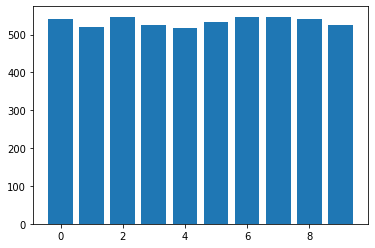

In [13]:
lab_di = {x:0 for x in range(10)}
for label in y_train:
    lab_di[label] += 1

plt.bar(lab_di.keys(),lab_di.values())
plt.show()

### Creating Training Image Generator

In [14]:
train_gen =tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range=0.1,
    rotation_range= 5,
    shear_range=0.1,
    zoom_range=0.1
)

In [15]:
train_gen.fit(X_train)

------------------
### Defining Model Layers

LeNet-5 Architecture

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6,(5,5),input_shape=(32,32,1),padding = 'valid' ,activation = 'tanh',strides= 1),
#     tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(16,(5,5),padding = 'valid',activation = 'tanh'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.MaxPool2D((2,2)),
#     tf.keras.layers.Conv2D(32,(5,5), padding = 'same',activation = 'relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.MaxPool2D((2,2)),
#     tf.keras.layers.Conv2D(28,(3,3),padding = 'same',activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2)),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(256, activation = 'relu'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(84, activation = 'tanh'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

----------------
### Creating a Callback

In [17]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.965):
            print("\n 96% accuracy reached")
            self.model.stop_training = True
mycallback()

----------------
### Training Model

In [18]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
Info = model.fit_generator(
    train_gen.flow(X_train,y_train,batch_size=10),
#     steps_per_epoch=700,
    epochs=10,
    callbacks=[mycallback()],
    validation_data = (X_val,y_val),
    shuffle =1
)

D:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
534/534 [==============================] - 15s 9ms/step - loss: 0.6616 - accuracy: 0.7952 - val_loss: 0.1534 - val_accuracy: 0.9579
Epoch 2/10
534/534 [==============================] - 4s 7ms/step - loss: 0.2471 - accuracy: 0.9280 - val_loss: 0.1493 - val_accuracy: 0.9522
Epoch 3/10
534/534 [==============================] - 4s 7ms/step - loss: 0.1724 - accuracy: 0.9468 - val_loss: 0.0618 - val_accuracy: 0.9843
Epoch 4/10
534/534 [==============================] - 3s 6ms/step - loss: 0.1371 - accuracy: 0.9567 - val_loss: 0.0638 - val_accuracy: 0.9803
Epoch 5/10
534/534 [==============================] - 2s 5ms/step - loss: 0.1131 - accuracy: 0.9648 - val_loss: 0.0576 - val_accuracy: 0.9860
Epoch 6/10
534/534 [==============================] - 2s 5ms/step - loss: 0.1151 - accuracy: 0.9629 - val_loss: 0.0556 - val_accuracy: 0.9843
Epoch 7/10
534/534 [==============================] - 2s 4ms/step - loss: 0.0918 - accuracy: 0.9713 - val_loss: 0.0529 - val_accuracy: 0.9831

 96%

In [20]:
Info.history['accuracy'][-1]

0.9713321924209595

In [21]:
Test_Info = model.evaluate(X_test,y_test)

96/96 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9882


In [22]:
Test_Info[-1] * 100

98.82006049156189

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

### Running a Test Image warped from actual sudoku.

(32, 32)

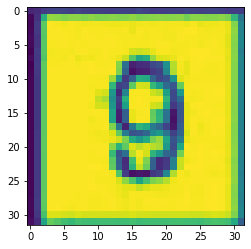

In [24]:
# Test Case 1 --Output should be 9
img = cv2.imread('1 - Copy.jpg')
img = cv2.resize(img, (32,32))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
img.shape

In [25]:
img = np.asarray(img)
img = img.reshape(1,32,32,1)
img = img/255.
img.shape

(1, 32, 32, 1)

In [26]:
pred = model.predict(img)
pred

array([[1.5230247e-08, 5.0874485e-04, 1.1751495e-03, 1.2352249e-01,
        1.0319781e-03, 1.2299549e-01, 1.3109910e-03, 4.3705699e-04,
        1.0418286e-02, 7.3859978e-01]], dtype=float32)

In [27]:
np.argmax(pred)

9

In [154]:
model.save('digit_recog_main.h5')

In [33]:
#my models are fucked up in detecting empty slots and 7

In [ ]:
#model 3 great performance still lacking in differentiating 7 and empty space